In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [2]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [3]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [4]:
### Your code is here
numeric_columns = df.loc[:,df.dtypes!=np.object].columns
df.loc[:,df.dtypes!=np.object].head(2)


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.905,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.450,0,38.0,56,78,2


In [5]:
categorical_columns = df.loc[:,df.dtypes==np.object].columns
df.loc[:,df.dtypes==np.object].head(2)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689460,B,A,A,Female
T0005689461,B,B,A,Male


In [6]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [7]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df[numeric_columns].isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
Surge_Pricing_Type          0
dtype: int64

In [9]:
df[numeric_columns].corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.135928
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.027194
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.073692
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,-0.013754
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003437
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027194,-0.073692,-0.155279,0.185646,-0.013754,0.003437,-0.039309,1.000000


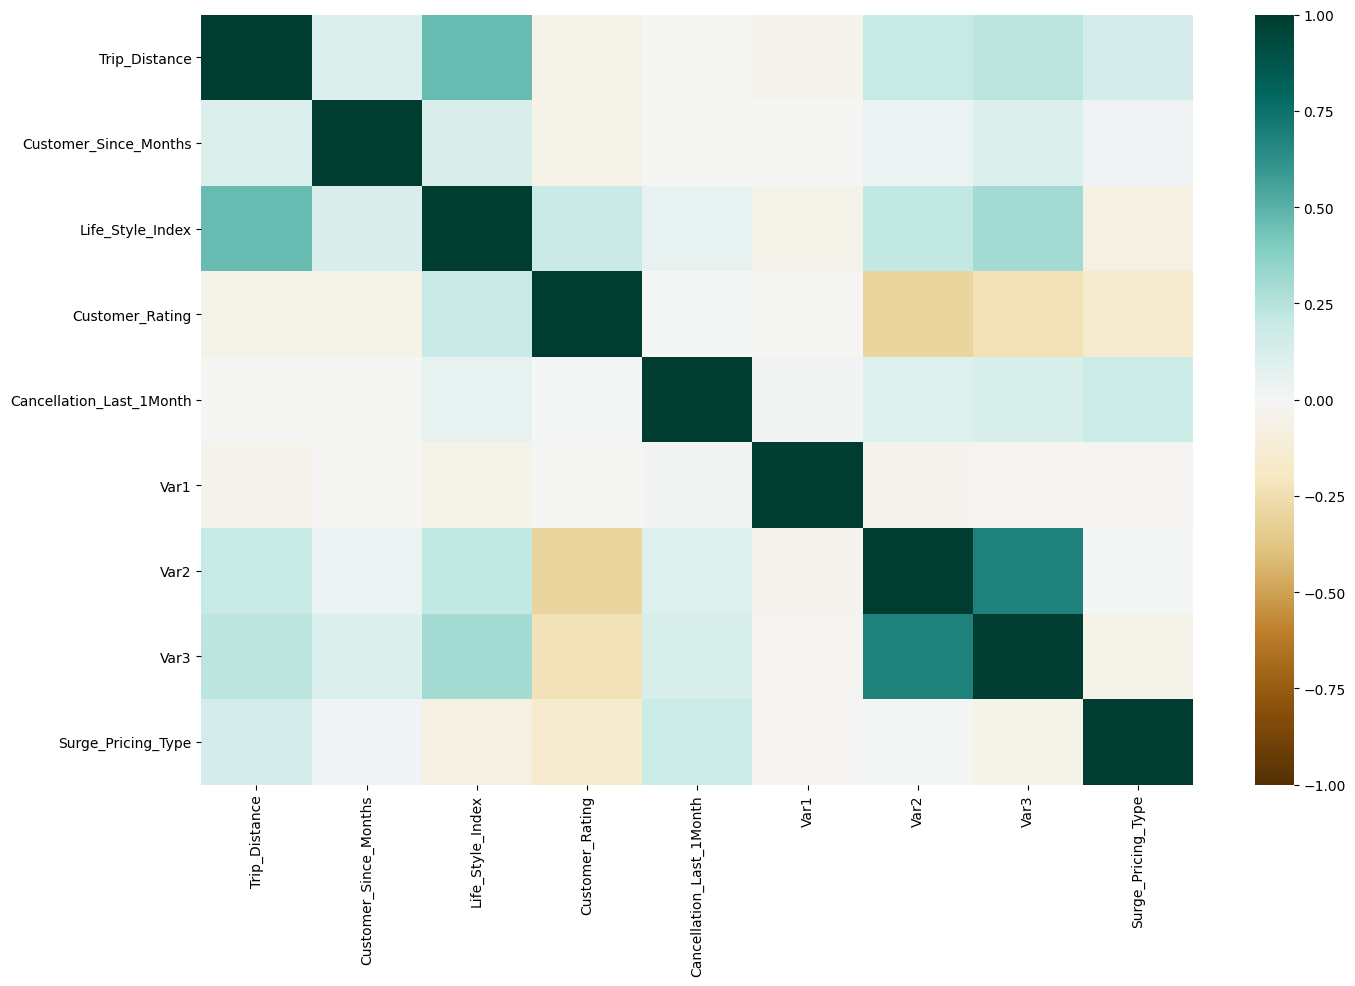

In [10]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [11]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
Var2                      Var3                  0.683437
Trip_Distance             Life_Style_Index      0.468332
Life_Style_Index          Var3                  0.303324
Customer_Rating           Var2                  0.302968
Trip_Distance             Var3                  0.231706
Customer_Rating           Var3                  0.227531
Life_Style_Index          Var2                  0.215944
Trip_Distance             Var2                  0.200456
Life_Style_Index          Customer_Rating       0.189165
Cancellation_Last_1Month  Surge_Pricing_Type    0.185646
dtype: float64


In [12]:
df.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


In [27]:
top_list = list(df.describe(include='object').loc['top'])

In [30]:
for top, col in enumerate(categorical_columns):
    #most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(top_list[top])


df.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,51346,60548,77597,93900


In [32]:
for col in categorical_columns:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)     
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
X = df.drop('Surge_Pricing_Type', axis=1)
Y = df['Surge_Pricing_Type']

### Training

In [36]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [39]:
Y.head()

Trip_ID
T0005689460    2
T0005689461    2
T0005689464    2
T0005689465    3
T0005689467    2
Name: Surge_Pricing_Type, dtype: int64

In [40]:
Y.value_counts()


2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [50]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Your code is here

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(LogisticRegression()))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [51]:
print(pipe.classes_)

print(pipe.predict(X_test.head(1)))

print(pipe.decision_function(X_test.head(1)))

print(pipe.predict_proba(X_test.head(1)))

[1 2 3]
[3]
[[-0.95310754 -0.98981002 -0.49843552]]
[[0.30013462 0.29224922 0.40761616]]


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [99]:
### Your code is here
search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.68062):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [106]:
pipe.set_params(one_vs_all__estimator__C=search.best_params_['one_vs_all__estimator__C'], 
                one_vs_all__estimator__penalty=search.best_params_['one_vs_all__estimator__penalty'])
pipe.fit(X_train, y_train)

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [93]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_prob_test = lb.fit_transform(y_test)
y_prob_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

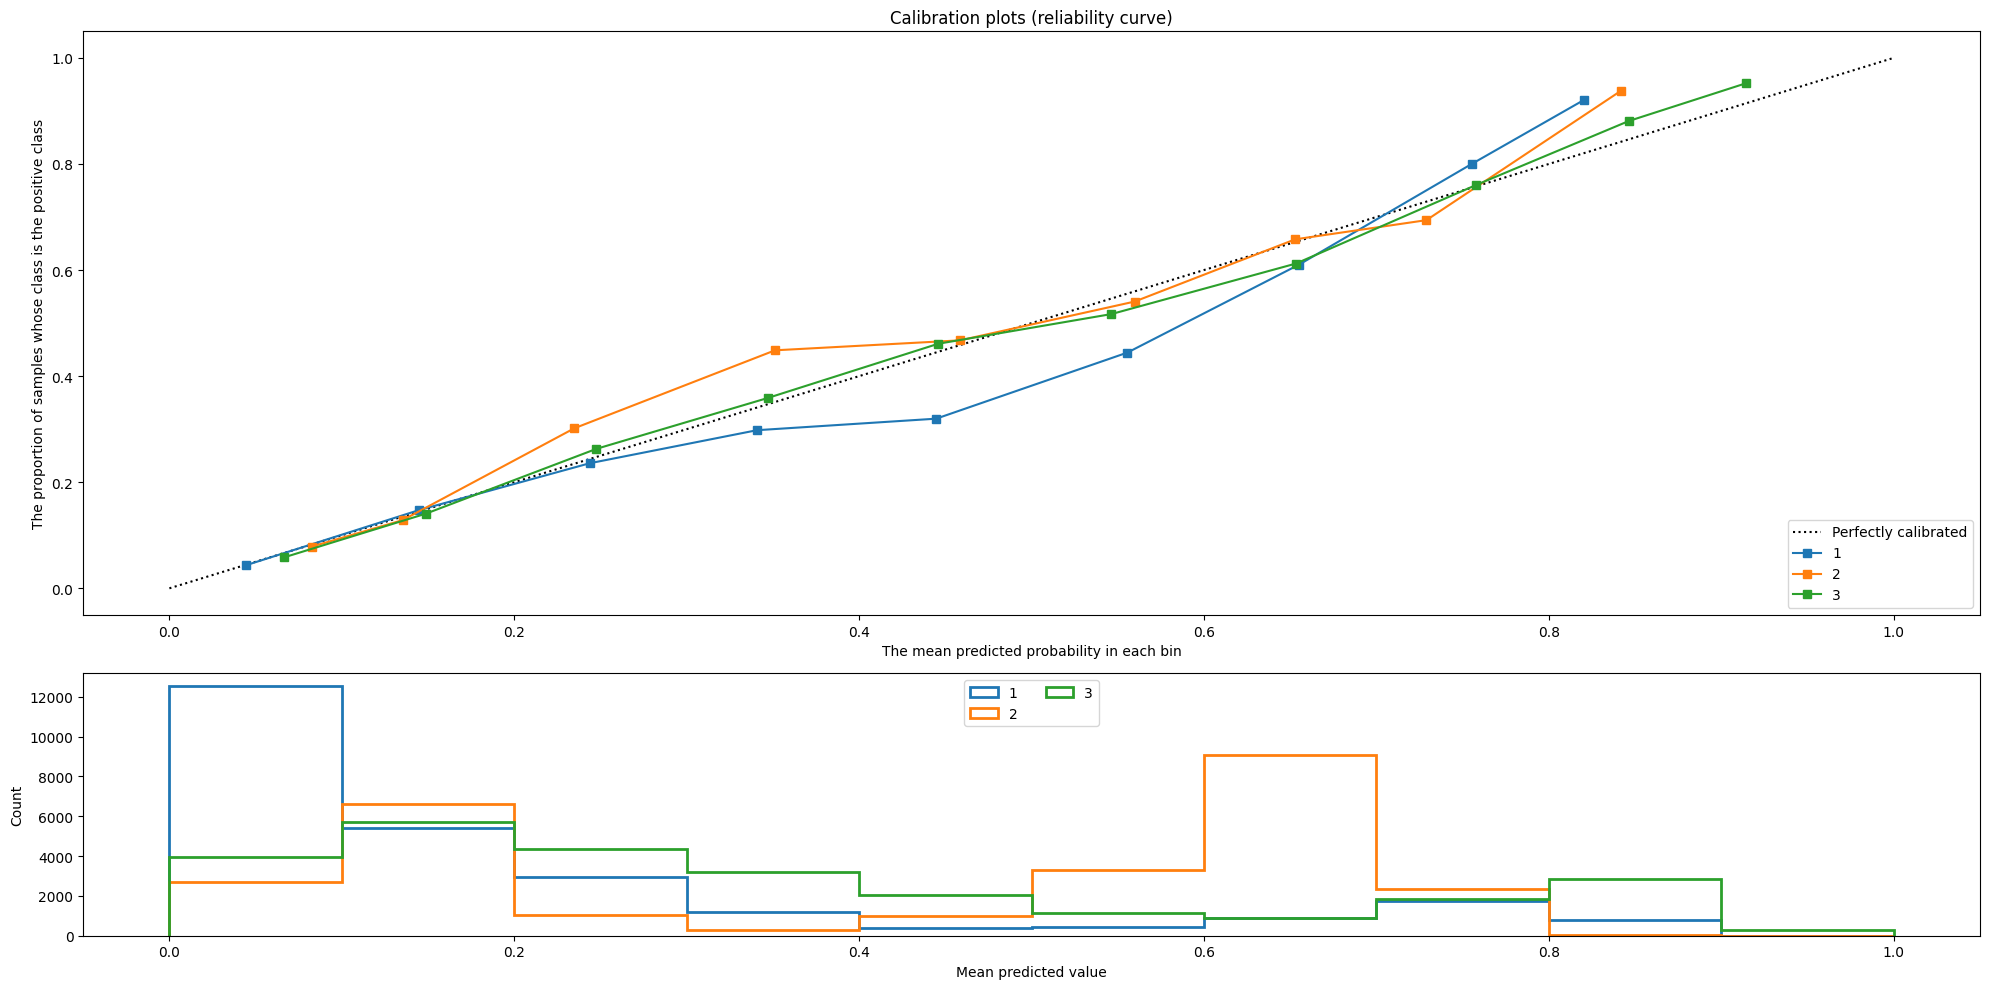

In [97]:
### Your code is here
from sklearn.calibration import calibration_curve

plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

targets = range(len(lb.classes_))
for target in targets:
    prob_pos = pipe.predict_proba(X_test)[:, target]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_prob_test[:, target], prob_pos, n_bins=10)
    name = lb.classes_[target]

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

ax1.set_ylabel("The proportion of samples whose class is the positive class")
ax1.set_xlabel("The mean predicted probability in each bin")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [113]:
### Создание полиномиальных признаков

X_polinomial = X.copy()
numeric_pol_columns = X_polinomial.loc[:,df.dtypes!=np.object].columns[0:8]
numeric_pol_columns


### Your code is here


Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'],
      dtype='object')

In [112]:
X_polinomial.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,...,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.015912,2.801448,2.849458,0.782838,62.474883,51.202800,75.099019,0.389983,0.213592,...,0.014811,0.011309,0.009570,0.006175,0.005279,0.005165,0.004884,0.000706,0.000744,0.713190
std,25.522882,3.544411,0.207765,0.980675,1.037559,14.893324,4.986142,11.578278,0.487748,0.409844,...,0.120795,0.105742,0.097357,0.078338,0.072463,0.071681,0.069713,0.026568,0.027272,0.452274
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,61.000000,48.000000,67.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,61.000000,54.000000,82.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
for col in numeric_pol_columns:
    for power in [2, 3, 4]:
        
        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)
X_polinomial.shape

(131662, 76)

In [116]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, Y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [124]:
### Your code is here
pipe_poly = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", LogisticRegression())])

param_grid_poly = {'one_vs_all__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__C': [0.001, 0.01, 0.1, 1]}
pipe_poly.fit(X_train, y_train)
search_poly = GridSearchCV(pipe_poly, param_grid_poly)

search_poly.fit(X_train, y_train)

print(f"Best parameter (CV score={search_poly.best_score_:.5f}):")
print(search_poly.best_params_)

pipe_poly.set_params(one_vs_all__C=search_poly.best_params_['one_vs_all__C'], 
                one_vs_all__penalty=search_poly.best_params_['one_vs_all__penalty'])
pipe_poly.fit(X_train, y_train)

print(classification_report(y_test, pipe_poly.predict(X_test), digits=3))

Best parameter (CV score=0.68039):
{'one_vs_all__C': 0.001, 'one_vs_all__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

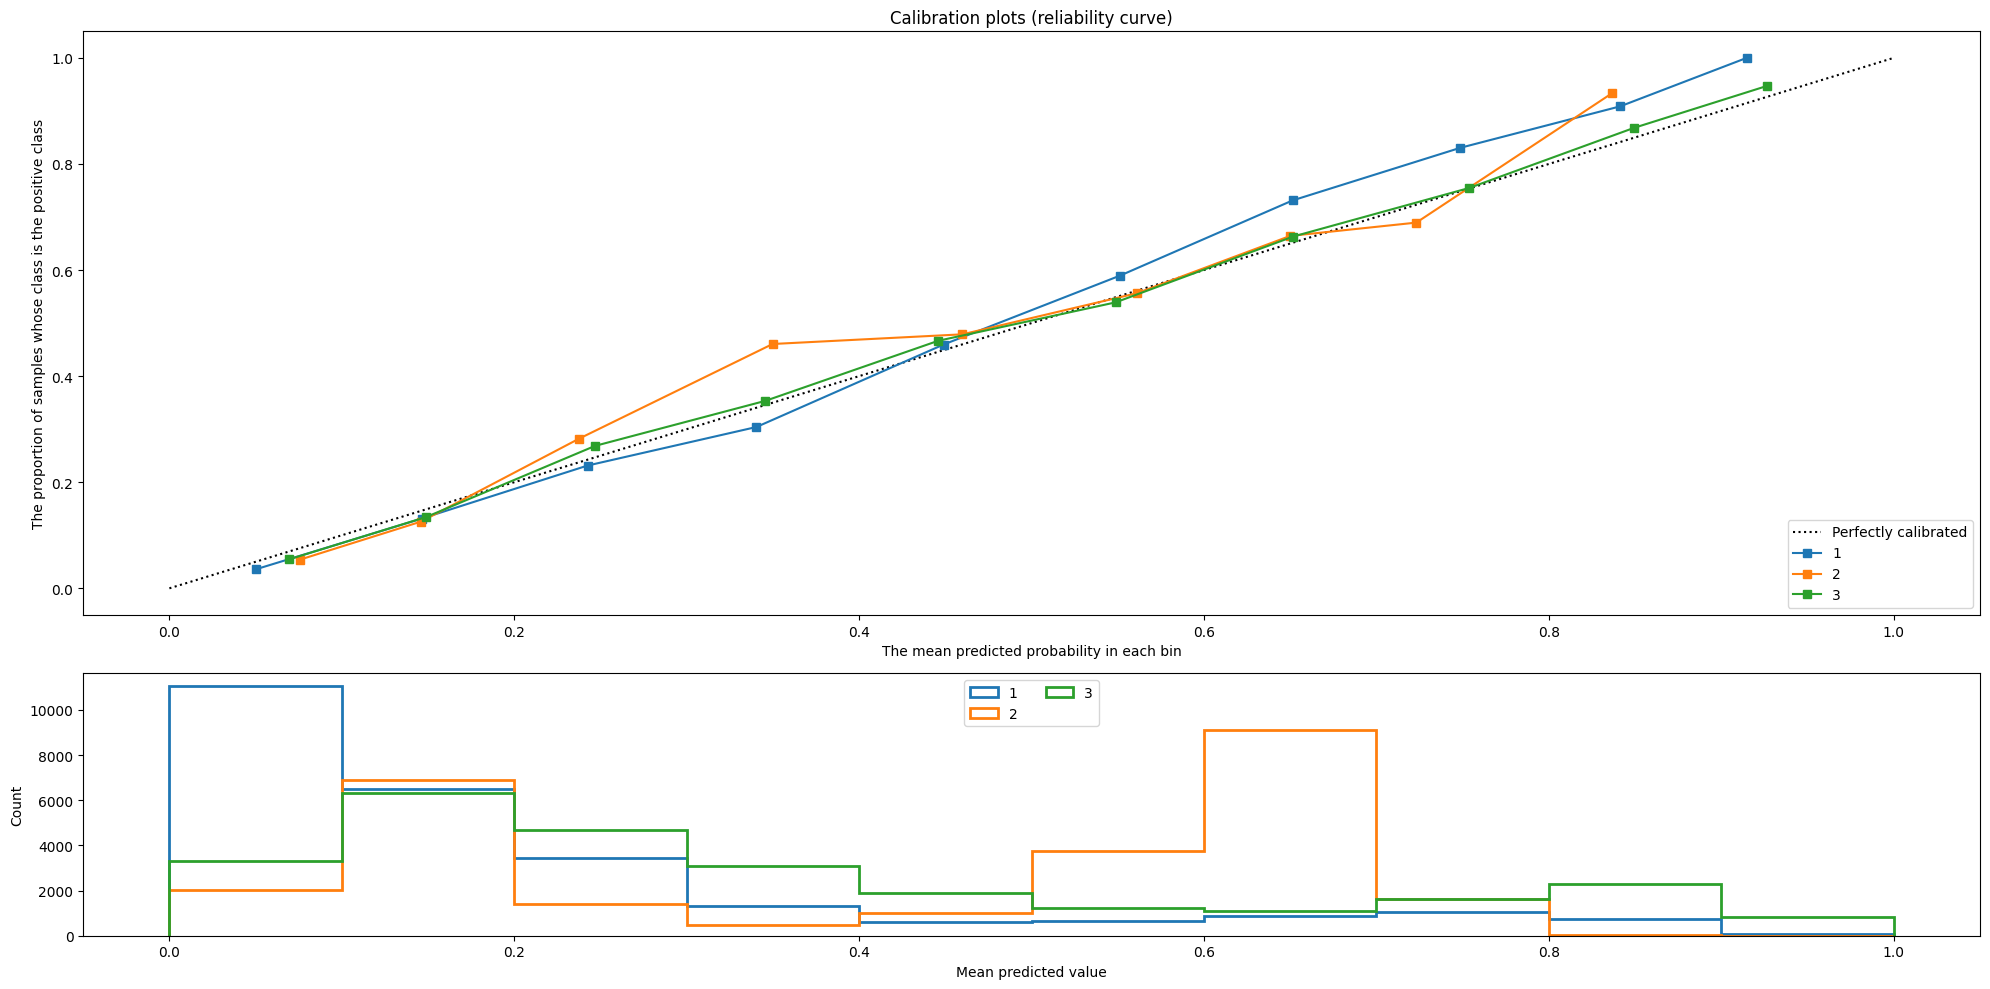

In [125]:
### Your code is here
plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

targets = range(len(lb.classes_))
for target in targets:
    prob_pos = pipe_poly.predict_proba(X_test)[:, target]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_prob_test[:, target], prob_pos, n_bins=10)
    name = lb.classes_[target]

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

ax1.set_ylabel("The proportion of samples whose class is the positive class")
ax1.set_xlabel("The mean predicted probability in each bin")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [134]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [135]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_all = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_one", OneVsOneClassifier(SGDClassifier()))])

pipe_all.fit(X_train, y_train)
print(classification_report(y_test, pipe_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.735     0.526     0.613      5372
           2      0.625     0.876     0.730     11349
           3      0.766     0.524     0.623      9612

    accuracy                          0.676     26333
   macro avg      0.709     0.642     0.655     26333
weighted avg      0.699     0.676     0.667     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [136]:
param_grid_all = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [137]:
### Your code is here
search_all = GridSearchCV(pipe_all, param_grid_all)

search_all.fit(X_train, y_train)

print(f"Best parameter (CV score={search_all.best_score_:.5f}):")
print(search_all.best_params_)

pipe_all.set_params(one_vs_one__estimator__loss=search_all.best_params_['one_vs_one__estimator__loss'],
                one_vs_one__estimator__alpha=search_all.best_params_['one_vs_one__estimator__alpha'], 
                one_vs_one__estimator__penalty=search_all.best_params_['one_vs_one__estimator__penalty'])
pipe_all.fit(X_train, y_train)

print(classification_report(y_test, pipe_all.predict(X_test), digits=3))


Best parameter (CV score=0.68107):
{'one_vs_one__estimator__alpha': 0.1, 'one_vs_one__estimator__loss': 'modified_huber', 'one_vs_one__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.747     0.530     0.620      5372
           2      0.631     0.846     0.723     11349
           3      0.745     0.567     0.644      9612

    accuracy                          0.680     26333
   macro avg      0.708     0.648     0.662     26333
weighted avg      0.697     0.680     0.673     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?